# Symptoms



In [1]:
# Add all of your import statements here
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)




### Setup, Cleaning, Organizing, and Exploring the Data

In [2]:
#read in the data
df_raw_data = pd.read_csv('symptom_dataset.csv')
#drop the NAs
#df = df.dropna()
#show the head
df_raw_data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
cols = df_raw_data.columns
cols

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')

### Distribution of data 

In [4]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [5]:
#Let's check the null values 
number_of_missing_values = df_raw_data.isna().sum().sort_values(ascending=False)          
percentage_of_missing_values = (df_raw_data.isna().sum()*100/df_raw_data.isna().count() ).sort_values(ascending=False)   
missing_data = pd.concat([number_of_missing_values,percentage_of_missing_values], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Symptom_17,4848,98.536585
Symptom_16,4728,96.097561
Symptom_15,4680,95.121951
Symptom_14,4614,93.780488
Symptom_13,4416,89.756098
Symptom_12,4176,84.878049
Symptom_11,3726,75.731707
Symptom_10,3408,69.268293
Symptom_9,3228,65.609756
Symptom_8,2976,60.487805


In [6]:
df_symptoms = df_raw_data.loc[:,['Disease','Symptom_1', 'Symptom_2', 'Symptom_3']]
df_symptoms

,Disease,Symptom_1,Symptom_2,Symptom_3
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches
3,Fungal infection,itching,skin_rash,dischromic _patches
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions
...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea
4916,Acne,skin_rash,pus_filled_pimples,blackheads
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine
4918,Psoriasis,skin_rash,joint_pain,skin_peeling


### Univariate Analysis of Disease

univariate analysis of Disease
-----------------------------------
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                             

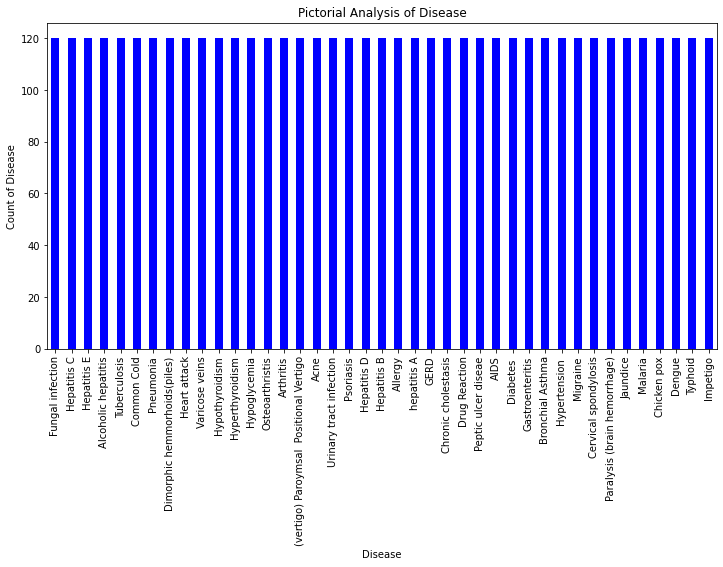

In [7]:
print('univariate analysis of Disease')
print('-----------------------------------')
print(df_symptoms['Disease'].value_counts())
plt.rcParams['figure.figsize']=(12,6)
df_symptoms['Disease'].value_counts().plot(kind='bar',color='b')
plt.title('Pictorial Analysis of Disease')
plt.xlabel('Disease')
plt.ylabel('Count of Disease')
plt.show()

#### All diseases are present in an equal number

### Distribution of symptoms

univariate analysis of Symptom_1
-----------------------------------
 vomiting                       822
 fatigue                        690
itching                         678
 skin_rash                      480
 chills                         474
 joint_pain                     462
 continuous_sneezing            222
 headache                       126
 acidity                        120
 stomach_pain                   114
 constipation                   114
 muscle_weakness                114
 burning_micturition            108
 muscle_wasting                 108
 back_pain                      108
 bladder_discomfort              12
 weight_gain                     12
 breathlessness                  12
 yellowish_skin                  12
 weakness_in_limbs               12
 chest_pain                      12
 cough                           12
 sunken_eyes                     12
 patches_in_throat               12
 indigestion                     12
 shivering                     

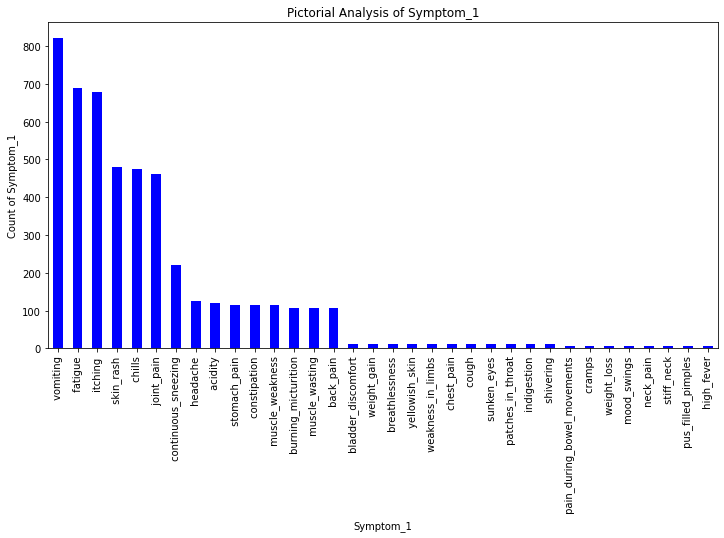

In [8]:
print('univariate analysis of Symptom_1')
print('-----------------------------------')
print(df_symptoms['Symptom_1'].value_counts())
plt.rcParams['figure.figsize']=(12,6)
df_symptoms['Symptom_1'].value_counts().plot(kind='bar',color='b')
plt.title('Pictorial Analysis of Symptom_1')
plt.xlabel('Symptom_1')
plt.ylabel('Count of Symptom_1')
plt.show()

#### The most common diseases are vomiting, fatigue, itching, skin rash, chills, joint_pain.

univariate analysis of Symptom_2
-----------------------------------
 vomiting                       870
 fatigue                        402
 skin_rash                      306
 chills                         240
 yellowish_skin                 240
 headache                       216
 indigestion                    210
 high_fever                     156
 neck_pain                      132
 weight_loss                    120
 joint_pain                     120
 pain_during_bowel_movements    108
 stiff_neck                     108
 mood_swings                    108
 cough                          108
 cramps                         108
 acidity                        102
 bladder_discomfort             102
 pus_filled_pimples             102
 weight_gain                    102
 breathlessness                  96
 patches_in_throat               96
 chest_pain                      96
 shivering                       96
 sunken_eyes                     96
 weakness_in_limbs             

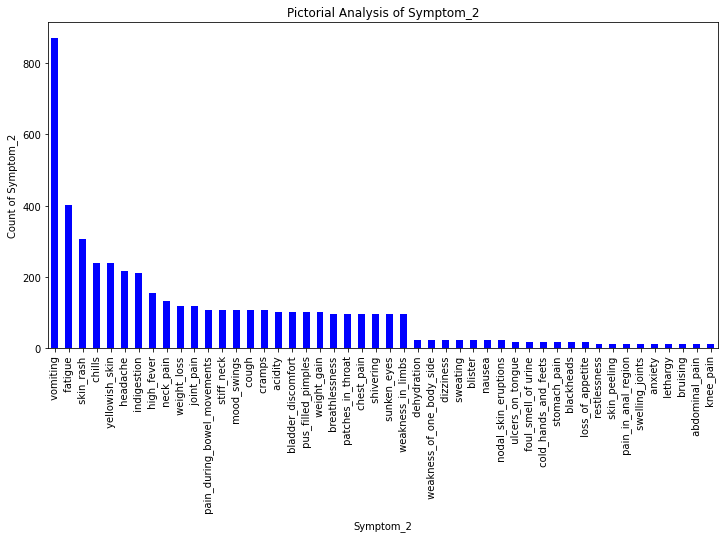

In [9]:
print('univariate analysis of Symptom_2')
print('-----------------------------------')
print(df_symptoms['Symptom_2'].value_counts())
plt.rcParams['figure.figsize']=(12,6)
df_symptoms['Symptom_2'].value_counts().plot(kind='bar',color='b')
plt.title('Pictorial Analysis of Symptom_2')
plt.xlabel('Symptom_2')
plt.ylabel('Count of Symptom_2')
plt.show()

#### Top 5 symptoms appearing as secondary symptoms vomiting, fatiguq,skin_rash, chills, yellow skin

### Let's analyze the common cold disease

In [10]:
#store the common cold data 
df_cold = df_symptoms[df_symptoms['Disease']=='Common Cold']

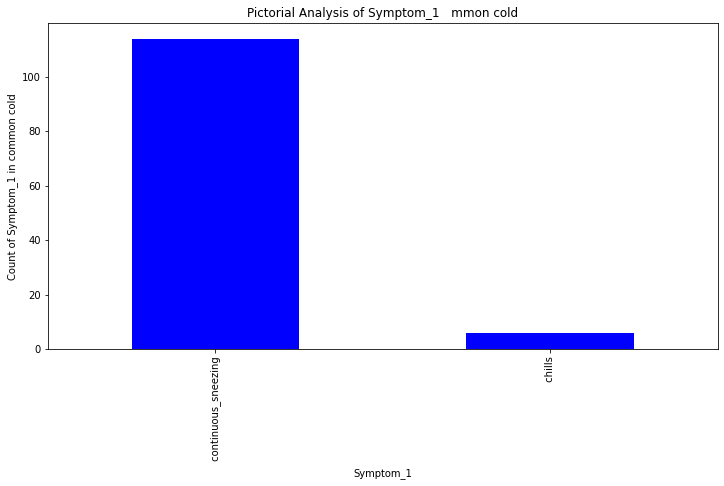

 continuous_sneezing    114
 chills                   6
Name: Symptom_1, dtype: int64
-----------------------------------
List the Symptom_1 in common cold


In [11]:

plt.rcParams['figure.figsize']=(12,6)
df_cold['Symptom_1'].value_counts().plot(kind='bar',color='b')
plt.title('Pictorial Analysis of Symptom_1   mmon cold')
plt.xlabel('Symptom_1')
plt.ylabel('Count of Symptom_1 in common cold')
plt.show()

print(df_cold['Symptom_1'].value_counts())
print('-----------------------------------')

print('List the Symptom_1 in common cold')

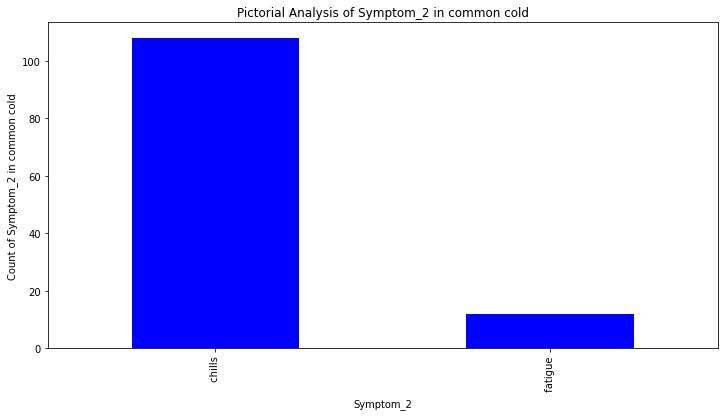

List the Symptom_2 in common cold
-----------------------------------
 chills     108
 fatigue     12
Name: Symptom_2, dtype: int64


In [12]:

plt.rcParams['figure.figsize']=(12,6)
df_cold['Symptom_2'].value_counts().plot(kind='bar',color='b')
plt.title('Pictorial Analysis of Symptom_2 in common cold')
plt.xlabel('Symptom_2')
plt.ylabel('Count of Symptom_2 in common cold')
plt.show()
print('List the Symptom_2 in common cold')
print('-----------------------------------')

print(df_cold['Symptom_2'].value_counts())

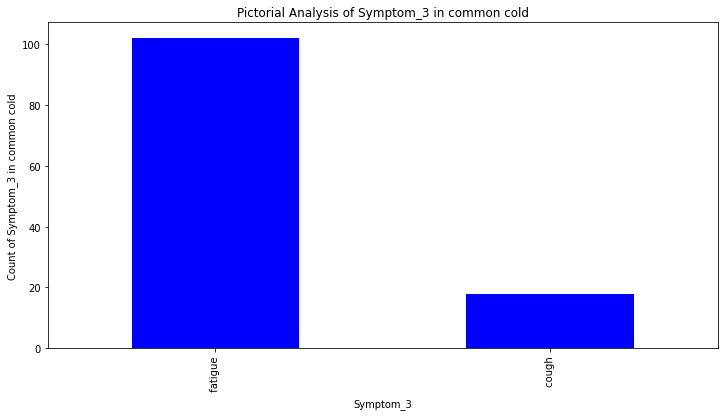

List the Symptom_3 in common cold
-----------------------------------
 fatigue    102
 cough       18
Name: Symptom_3, dtype: int64


In [13]:

plt.rcParams['figure.figsize']=(12,6)
df_cold['Symptom_3'].value_counts().plot(kind='bar',color='b')
plt.title('Pictorial Analysis of Symptom_3 in common cold')
plt.xlabel('Symptom_3')
plt.ylabel('Count of Symptom_3 in common cold')
plt.show()

print('List the Symptom_3 in common cold')
print('-----------------------------------')
print(df_cold['Symptom_3'].value_counts())

### Let's analyze another disease Hypertension

In [14]:
#store the common cold data 
df_hypertension = df_symptoms[df_symptoms['Disease']=='Hypertension ']
df_hypertension

,Disease,Symptom_1,Symptom_2,Symptom_3
100,Hypertension,headache,chest_pain,dizziness
101,Hypertension,chest_pain,dizziness,loss_of_balance
102,Hypertension,headache,dizziness,loss_of_balance
103,Hypertension,headache,chest_pain,loss_of_balance
104,Hypertension,headache,chest_pain,dizziness
...,...,...,...,...
4725,Hypertension,headache,chest_pain,dizziness
4766,Hypertension,headache,chest_pain,dizziness
4807,Hypertension,headache,chest_pain,dizziness
4848,Hypertension,headache,chest_pain,dizziness


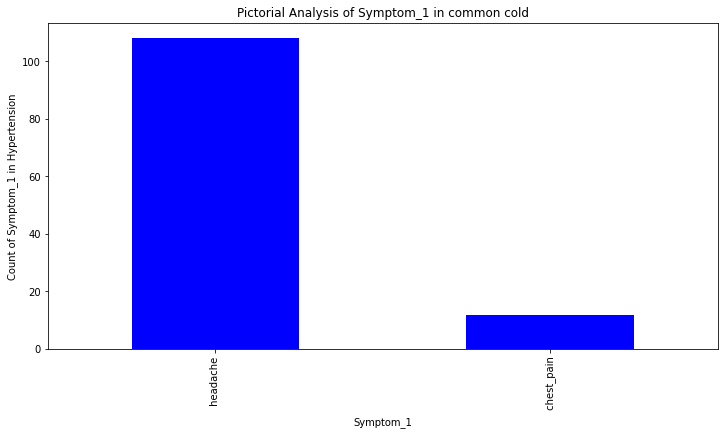

List the Symptom_1 in Hypertension
-----------------------------------
 headache      108
 chest_pain     12
Name: Symptom_1, dtype: int64


In [15]:

plt.rcParams['figure.figsize']=(12,6)
df_hypertension['Symptom_1'].value_counts().plot(kind='bar',color='b')
plt.title('Pictorial Analysis of Symptom_1 in common cold')
plt.xlabel('Symptom_1')
plt.ylabel('Count of Symptom_1 in Hypertension')
plt.show()
print('List the Symptom_1 in Hypertension')
print('-----------------------------------')

print(df_hypertension['Symptom_1'].value_counts())

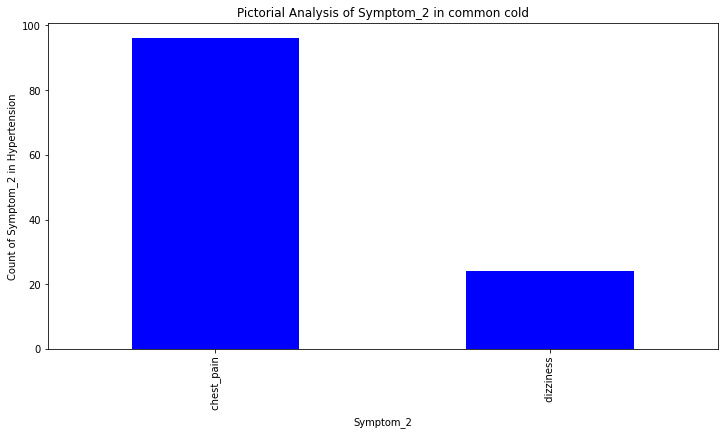

List the Symptom_2 in Hypertension
-----------------------------------
 chest_pain    96
 dizziness     24
Name: Symptom_2, dtype: int64


In [16]:

plt.rcParams['figure.figsize']=(12,6)
df_hypertension['Symptom_2'].value_counts().plot(kind='bar',color='b')
plt.title('Pictorial Analysis of Symptom_2 in common cold')
plt.xlabel('Symptom_2')
plt.ylabel('Count of Symptom_2 in Hypertension')
plt.show()
print('List the Symptom_2 in Hypertension')
print('-----------------------------------')

print(df_hypertension['Symptom_2'].value_counts())

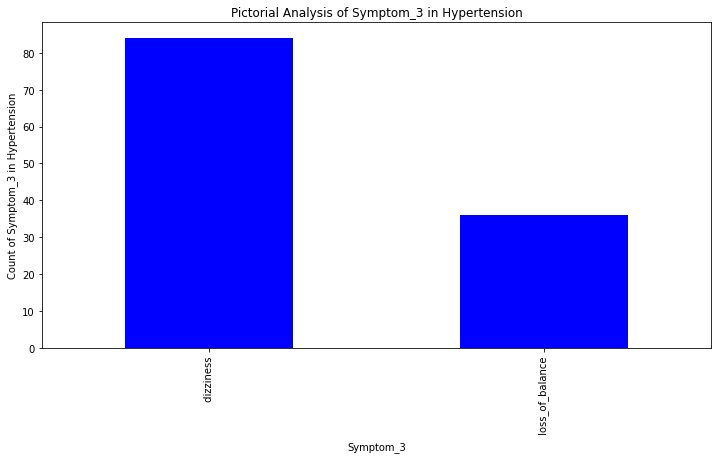

List the Symptom_3 in Hypertension
-----------------------------------
 dizziness          84
 loss_of_balance    36
Name: Symptom_3, dtype: int64


In [17]:

plt.rcParams['figure.figsize']=(12,6)
df_hypertension['Symptom_3'].value_counts().plot(kind='bar',color='b')
plt.title('Pictorial Analysis of Symptom_3 in Hypertension')
plt.xlabel('Symptom_3')
plt.ylabel('Count of Symptom_3 in Hypertension')
plt.show()

print('List the Symptom_3 in Hypertension')
print('-----------------------------------')
print(df_hypertension['Symptom_3'].value_counts())

### List the Diseases with vomiting symptoms

In [18]:
#store the common cold data 
df_vomiting = df_symptoms[df_symptoms['Symptom_1']==' vomiting']
df_vomiting

,Disease,Symptom_1,Symptom_2,Symptom_3
31,Chronic cholestasis,vomiting,yellowish_skin,nausea
50,Peptic ulcer diseae,vomiting,loss_of_appetite,abdominal_pain
51,Peptic ulcer diseae,vomiting,indigestion,abdominal_pain
53,Peptic ulcer diseae,vomiting,loss_of_appetite,abdominal_pain
54,Peptic ulcer diseae,vomiting,indigestion,abdominal_pain
...,...,...,...,...
4892,Paralysis (brain hemorrhage),vomiting,headache,weakness_of_one_body_side
4903,Alcoholic hepatitis,vomiting,yellowish_skin,abdominal_pain
4908,Heart attack,vomiting,breathlessness,sweating
4912,Hypoglycemia,vomiting,fatigue,anxiety


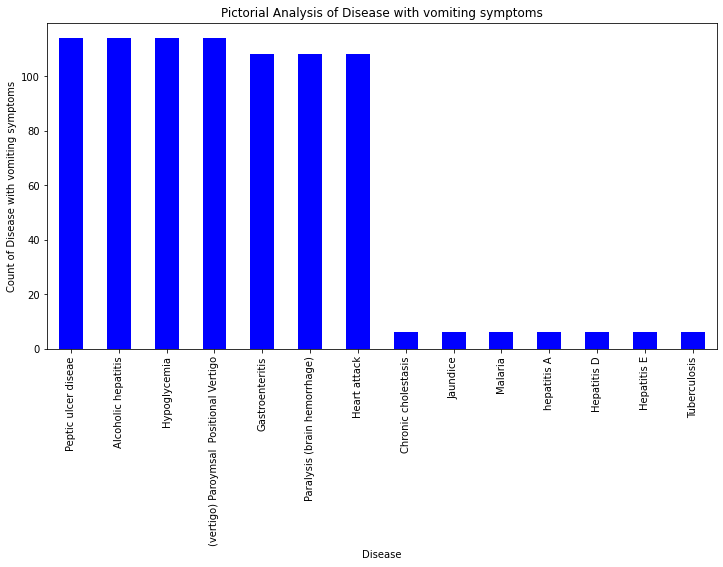

List the Disease with vomiting symptoms
-----------------------------------
Peptic ulcer diseae                        114
Alcoholic hepatitis                        114
Hypoglycemia                               114
(vertigo) Paroymsal  Positional Vertigo    114
Gastroenteritis                            108
Paralysis (brain hemorrhage)               108
Heart attack                               108
Chronic cholestasis                          6
Jaundice                                     6
Malaria                                      6
hepatitis A                                  6
Hepatitis D                                  6
Hepatitis E                                  6
Tuberculosis                                 6
Name: Disease, dtype: int64


In [19]:

plt.rcParams['figure.figsize']=(12,6)
df_vomiting['Disease'].value_counts().plot(kind='bar',color='b')
plt.title('Pictorial Analysis of Disease with vomiting symptoms')
plt.xlabel('Disease')
plt.ylabel('Count of Disease with vomiting symptoms')
plt.show()
print('List the Disease with vomiting symptoms')
print('-----------------------------------')

print(df_vomiting['Disease'].value_counts())